In [1]:
import numpy as np

In [2]:
A = np.array([
    [0,1,0,0],
    [0,0,1,1],
    [0,1,0,0],
    [1,0,1,0]],
    dtype=float
)

In [3]:
X = np.matrix([
            [i, -i]
            for i in range(A.shape[0])
        ], dtype=float)
print(X)

[[ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]]


In [4]:
A*X

matrix([[ 1., -1.],
        [ 5., -5.],
        [ 1., -1.],
        [ 2., -2.]])

In [5]:
I = np.matrix(np.eye(A.shape[0]))

In [6]:
A_hat = A + I
A_hat * X

matrix([[ 1., -1.],
        [ 6., -6.],
        [ 3., -3.],
        [ 5., -5.]])

In [7]:
def relu(X):
    return np.maximum(0,X)

relu(A_hat*X)

matrix([[1., 0.],
        [6., 0.],
        [3., 0.],
        [5., 0.]])

In [8]:
def softmax(X):
    expo = np.exp(X)
    expo_sum = np.sum(np.exp(X))
    return expo/expo_sum

softmax(A_hat*X)

matrix([[4.72684939e-03, 6.39709501e-04],
        [7.01526651e-01, 4.31032872e-06],
        [3.49269553e-02, 8.65752666e-05],
        [2.58077232e-01, 1.17166882e-05]])

In [9]:
D = np.array(np.sum(A, axis=0))
D = np.matrix(np.diag(D))
print(D)

[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]]


In [10]:
D_hat = np.sum(np.array(A_hat), axis=0)
D_hat = np.matrix(np.diag(D_hat))
print(D_hat)

[[2. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 2.]]


In [11]:
D_hat

matrix([[2., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 0., 3., 0.],
        [0., 0., 0., 2.]])

In [12]:
X1 = D_hat**-1 * A_hat * X

In [13]:
relu(X1)

matrix([[0.5, 0. ],
        [2. , 0. ],
        [1. , 0. ],
        [2.5, 0. ]])

In [14]:
from networkx import karate_club_graph, to_numpy_matrix

zkc = karate_club_graph()
order = sorted(list(zkc.nodes))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_h = A + I
D_h = np.array(np.sum(np.array(A_h), axis=0))
D_h = np.matrix(np.diag(D_h))
W_1 = np.random.normal(loc=0, scale=1, size=(zkc.number_of_nodes(),4))
W_2 = np.random.normal(loc=0, scale=1, size=(W_1.shape[1],2))


def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_h, D_h, I, W_1)
H_2 = gcn_layer(A_h, D_h, H_1, W_2)

output = H_2

feature_representations = {
    node: np.array(output)[node]
    for node in zkc.nodes()}


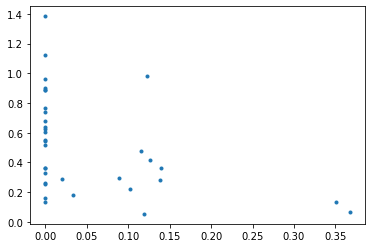

In [16]:
import matplotlib.pyplot as plt 
plt.plot(output[:,0],output[:,1],'.')

In [15]:
import networkx as nx

G = nx.DiGraph() #nx.Graph for undirected
L = ['pratik', 'maan', 'shringar']
G.add_nodes_from(L)
E = [('pratik','maan'),('pratik','shringar')]
G.add_edges_from(E)
#list(G.nodes)
#list(G.edges)
order = sorted(list(G.nodes))
GG = to_numpy_matrix(G,nodelist=order)
GG

matrix([[0., 0., 0.],
        [1., 0., 1.],
        [0., 0., 0.]])

In [18]:
callgraph = np.loadtxt('fgraph_G.txt', dtype=str)
callentityunique = np.unique(callgraph[:])
callentityunique
callGraph = nx.DiGraph()
callGraph.add_nodes_from(callentityunique)
callGraph.add_edges_from(callgraph)
Order = sorted(list(callGraph.nodes))
callG = to_numpy_matrix(callGraph, nodelist=Order)

In [19]:
callG.shape
callG
np.sum(callG)
#callG.shape

14791447.0

In [20]:
callG

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

In [21]:
meetGraph = np.loadtxt('meet_codes.csv',dtype=str)

In [22]:
meetGraph

array(['EREXYIPYZS', 'WTKTAXKIIU', 'WTKTAXKIIU', ..., 'EDTKAAGAZN',
       'EDTKAAGAZN', 'EDTKAAGAZN'], dtype='<U10')

In [23]:
mG = np.unique(meetGraph)

In [24]:
mG.shape

(2867,)

In [25]:
import pandas as pd
meetGraph1 = pd.read_csv('meet_logs_1602310788791.csv')
meetGraph1.head()

,Date,Event Name,Event Description,Meeting Code,Participant Identifier,Participant Outside Organisation,Client Type,Organizer Email,Product Type,Duration,...,Video Receive Duration,Video Receive Short Side Median,Network Congestion Ratio,Video Send Bitrate Mean in kbps,Video Send FPS Mean,Video Send Long Side Median,Video Send Packet Loss Max,Video Send Packet Loss Mean,Video Send Duration,Video Send Short Side Median
0,"Oct 10, 2020, 11:46:27 AM GMT+5:30",Endpoint left,The endpoint left a video meeting,EREXYIPYZS,201852001@iiitvadodara.ac.in,No,Android,201852020@iiitvadodara.ac.in,Google Meet,1057.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,"Oct 10, 2020, 11:45:38 AM GMT+5:30",Endpoint left,The endpoint left a video meeting,WTKTAXKIIU,NaN,Yes,Android,NaN,Google Meet,1376.0,...,1020.0,352.0,0.0,161.0,4.0,320.0,0.0,0.0,30.0,176.0
2,"Oct 10, 2020, 11:44:09 AM GMT+5:30",Endpoint left,The endpoint left a video meeting,WTKTAXKIIU,NaN,Yes,Web,NaN,Google Meet,1942.0,...,789.0,176.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,"Oct 10, 2020, 11:40:06 AM GMT+5:30",Endpoint left,The endpoint left a video meeting,WTKTAXKIIU,pk_ahluwalia@iiitvadodara.ac.in,No,Web,NaN,Google Meet,334.0,...,169.0,176.0,29.0,259.0,10.0,320.0,35.0,4.0,189.0,180.0
4,"Oct 10, 2020, 11:39:09 AM GMT+5:30",Endpoint left,The endpoint left a video meeting,WTKTAXKIIU,NaN,Yes,Web,NaN,Google Meet,825.0,...,416.0,176.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [26]:
df = pd.DataFrame(meetGraph1)
df['Participant Identifier'].unique().size

691

In [27]:
callG_hat = callG+np.matrix(np.eye(callG.shape[0]))
callG_hat = np.sum(np.array(callG_hat), axis=0)
callG_hat = np.matrix(np.diag(callG_hat))
print(callG_hat)

[[2.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 4.472e+03 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 4.472e+03 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 4.472e+03]]
